In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: set style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# 1. Load data (use your loader or direct path)
# If you want to use your project's loader:
# from src.data.loader import load_data
# df = load_data()  # full or sampled

# Or direct load (faster for EDA):
df = pd.read_csv("../data/paysim.csv", dtype={
    'step': 'int32',
    'type': 'category',
    'amount': 'float32',
    'oldbalanceOrg': 'float32',
    'newbalanceOrig': 'float32',
    'oldbalanceDest': 'float32',
    'newbalanceDest': 'float32',
    'isFraud': 'int8',
    'isFlaggedFraud': 'int8'
})

print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing values:\n", df.isnull().sum())

Shape: (6362620, 11)

Columns: ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']

Missing values:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


Fraud distribution:
isFraud
0    99.870918
1     0.129082
Name: proportion, dtype: float64


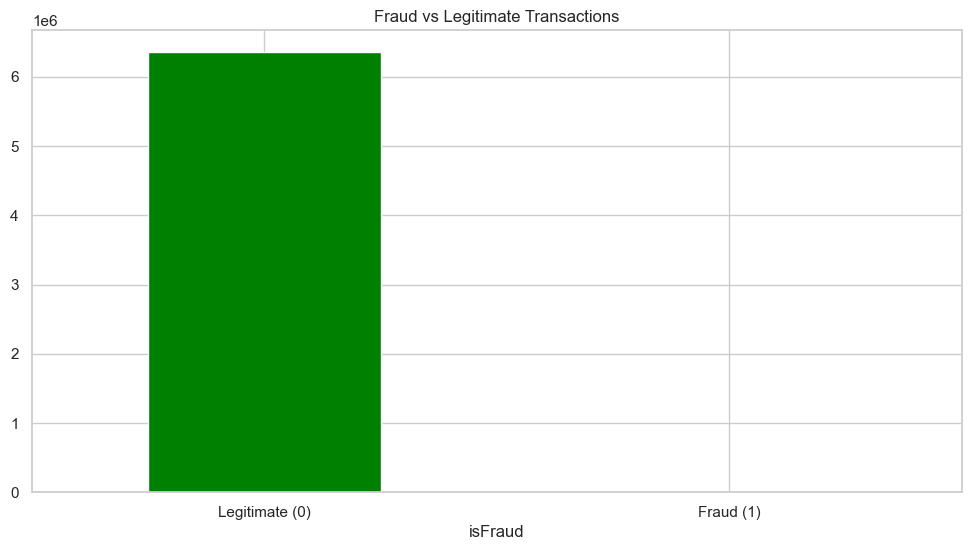

In [2]:
# 2. Fraud class distribution
print("Fraud distribution:")
print(df['isFraud'].value_counts(normalize=True) * 100)

fig, ax = plt.subplots()
df['isFraud'].value_counts().plot(kind='bar', ax=ax, color=['green', 'red'])
ax.set_title('Fraud vs Legitimate Transactions')
ax.set_xticklabels(['Legitimate (0)', 'Fraud (1)'], rotation=0)
plt.show()


Fraud rate by type:
            count      mean   Fraud %
type                                 
TRANSFER   532909  0.007688  0.768799
CASH_OUT  2237500  0.001840  0.183955
CASH_IN   1399284  0.000000  0.000000
DEBIT       41432  0.000000  0.000000
PAYMENT   2151495  0.000000  0.000000


/var/folders/4d/ly63n2hd38d850k9j7y0r4k00000gn/T/ipykernel_5626/2635888484.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_by_type = df.groupby('type')['isFraud'].agg(['count', 'mean'])


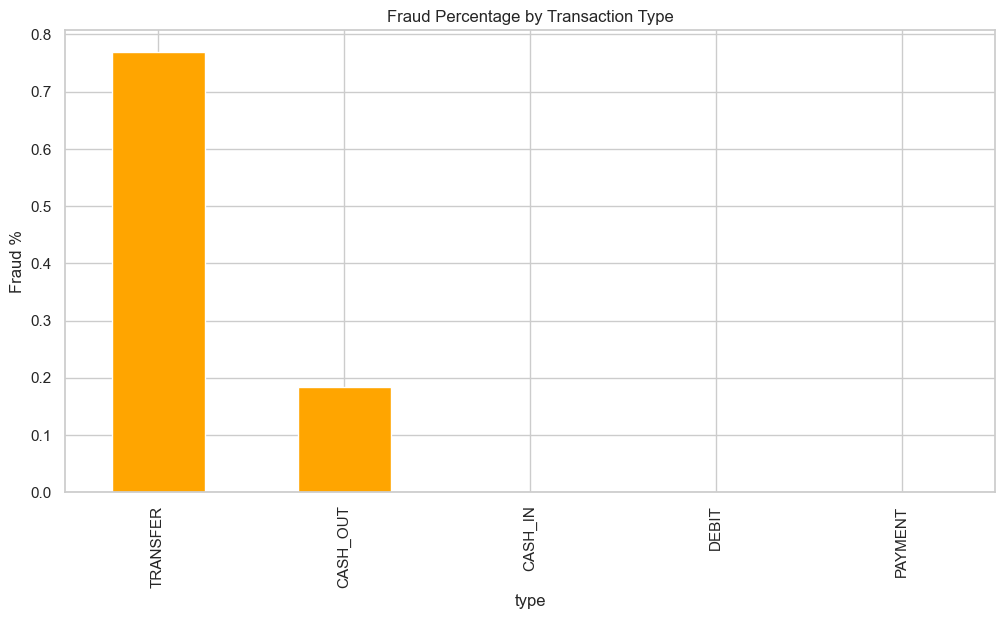

In [3]:
# 3. Fraud rate by transaction type
fraud_by_type = df.groupby('type')['isFraud'].agg(['count', 'mean'])
fraud_by_type['Fraud %'] = fraud_by_type['mean'] * 100
fraud_by_type = fraud_by_type.sort_values('Fraud %', ascending=False)

print("\nFraud rate by type:")
print(fraud_by_type)

fig, ax = plt.subplots()
fraud_by_type['Fraud %'].plot(kind='bar', ax=ax, color='orange')
ax.set_title('Fraud Percentage by Transaction Type')
ax.set_ylabel('Fraud %')
plt.show()

/var/folders/4d/ly63n2hd38d850k9j7y0r4k00000gn/T/ipykernel_5626/3739826080.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Legitimate', 'Fraud'])


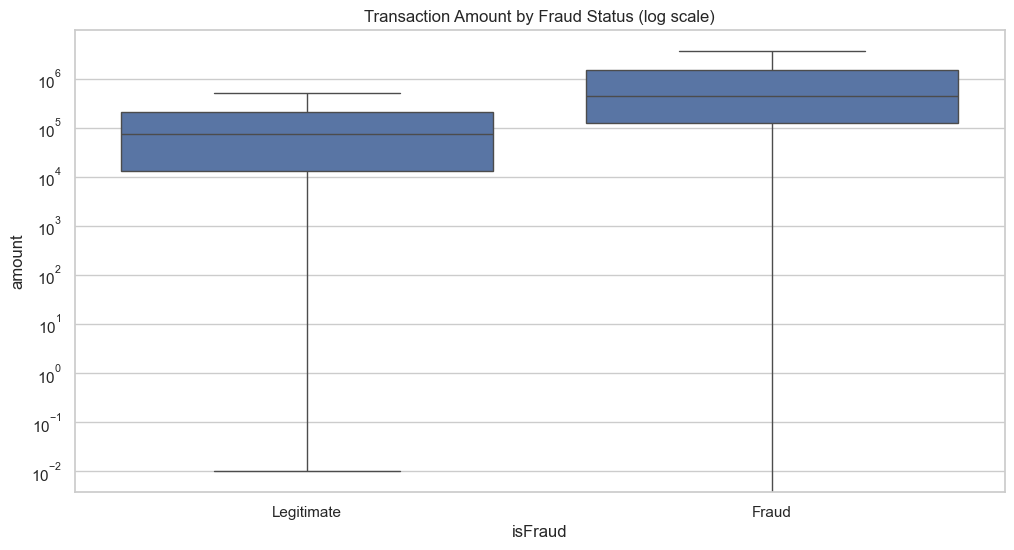

In [4]:
# 4. Amount distribution (log scale to handle skewness)
fig, ax = plt.subplots()
sns.boxplot(data=df, x='isFraud', y='amount', showfliers=False, ax=ax)
ax.set_title('Transaction Amount by Fraud Status (log scale)')
ax.set_yscale('log')
ax.set_xticklabels(['Legitimate', 'Fraud'])
plt.show()

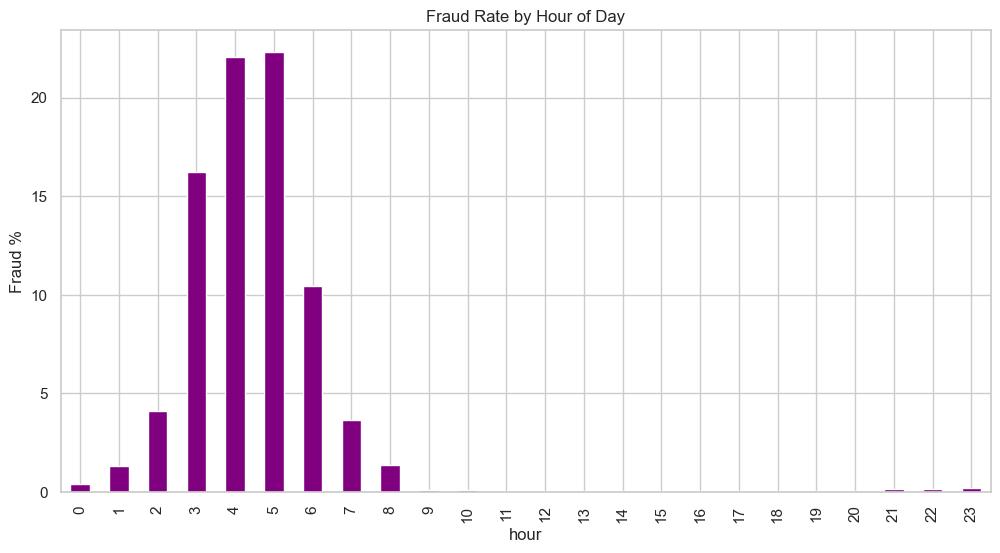

In [5]:
# 5. Time-based fraud pattern (step = hour simulation)
df['hour'] = df['step'] % 24
fraud_by_hour = df.groupby('hour')['isFraud'].mean() * 100

fig, ax = plt.subplots()
fraud_by_hour.plot(kind='bar', ax=ax, color='purple')
ax.set_title('Fraud Rate by Hour of Day')
ax.set_ylabel('Fraud %')
plt.show()

In [7]:
# 6. Balance anomaly check (amount > oldbalanceOrg)
df['balance_anomaly'] = df['amount'] > df['oldbalanceOrg']

print("Balance anomaly rate:")
print(df.groupby('isFraud')['balance_anomaly'].mean() * 100)

# Crosstab
pd.crosstab(df['balance_anomaly'], df['isFraud'], normalize='index') * 100

Balance anomaly rate:
isFraud
0    64.192473
1     0.353099
Name: balance_anomaly, dtype: float64


isFraud,0,1
balance_anomaly,,
False,99.641609,0.358391
True,99.999289,0.000711


In [6]:
# 7. Merchant vs Non-Merchant fraud rate
df['is_merchant'] = df['nameDest'].str.startswith('M')

print("Fraud rate by merchant destination:")
print(df.groupby('is_merchant')['isFraud'].mean() * 100)

Fraud rate by merchant destination:
is_merchant
False    0.195031
True     0.000000
Name: isFraud, dtype: float64


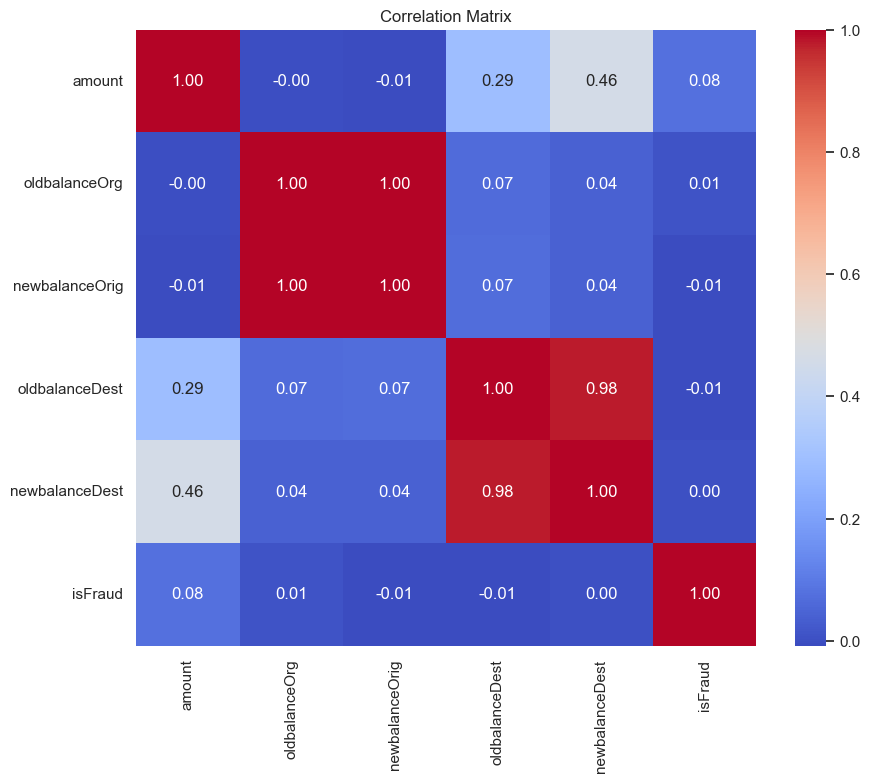

In [8]:
# 8. Correlation matrix (numeric columns only)
numeric_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']
corr = df[numeric_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [9]:
print("EDA complete. Key takeaways:")
print("- Fraud is extremely rare (~0.13%)")
print("- Almost all fraud occurs in TRANSFER and CASH-OUT")
print("- Balance anomaly is common even in legitimate cases")
print("- Large amounts are more common in fraud")

EDA complete. Key takeaways:
- Fraud is extremely rare (~0.13%)
- Almost all fraud occurs in TRANSFER and CASH-OUT
- Balance anomaly is common even in legitimate cases
- Large amounts are more common in fraud
